In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [4]:
from sklearn.linear_model import ARDRegression,LinearRegression

In [5]:
np.random.seed(0)
n_samples,n_features = 100,100
# samples表示样本数量，features表示x参数的数量

In [6]:
X=np.random.randn(n_samples,n_features)    #生成X矩阵，行数=样本数量，列数=x参数数量
# np.random.randn：从标准正态分布返回一个样本集，括号中提供int_like的参数，randn生成一个形状数组(d0,d1,...,dn)
# 标准正态分布：服从N(0,1)

In [7]:
lambda_ = 4
w=np.zeros(n_features)

In [10]:
relevant_features=np.random.randint(0,n_features,10)
# 从[low,high)区间中返回“离散均匀”分布的随机整数

In [13]:
for i in relevant_features:
    w[i]=stats.norm.rvs(loc=0,scale=1/np.sqrt(lambda_))
# stats.norm.rvs:一个正态的连续随机变量，loc指定平均值，scale指定标准偏差

In [17]:
alpha_ = 50
noise=stats.norm.rvs(loc=0,scale=1/np.sqrt(alpha_),size=n_samples)

In [21]:
y=np.dot(X,w)+noise

In [22]:
clf=ARDRegression(compute_score=True)
clf.fit(X,y)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)

In [23]:
ols=LinearRegression()
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

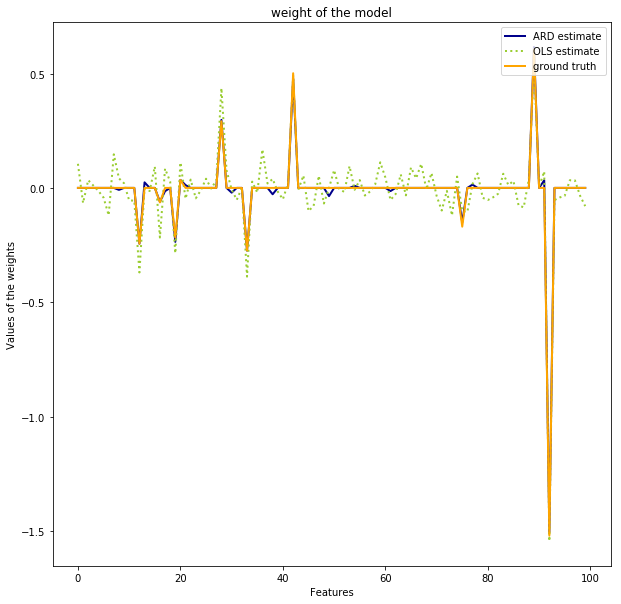

In [29]:
plt.figure(figsize=(10,10))
plt.title('weight of the model')
plt.plot(clf.coef_,color='darkblue',linestyle='-',linewidth=2,label='ARD estimate')
plt.plot(ols.coef_,color='yellowgreen',linestyle=':',linewidth=2,label='OLS estimate')
plt.plot(w,color='orange',linestyle='-',linewidth=2,label='ground truth')
plt.xlabel('Features')
plt.ylabel('Values of the weights')
plt.legend(loc=1)

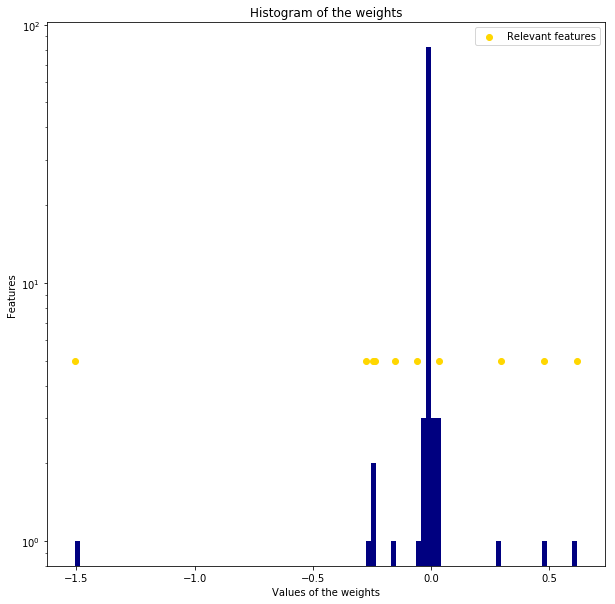

In [30]:
plt.figure(figsize=(10,10))
plt.title('Histogram of the weights')
plt.hist(clf.coef_,bins=n_features,color='navy',log=True)
plt.scatter(clf.coef_[relevant_features],np.full(len(relevant_features),5.),color='gold',marker='o',label='Relevant features')
plt.ylabel('Features')
plt.xlabel('Values of the weights')
plt.legend(loc=1)

Text(0.5,0,'iteration')

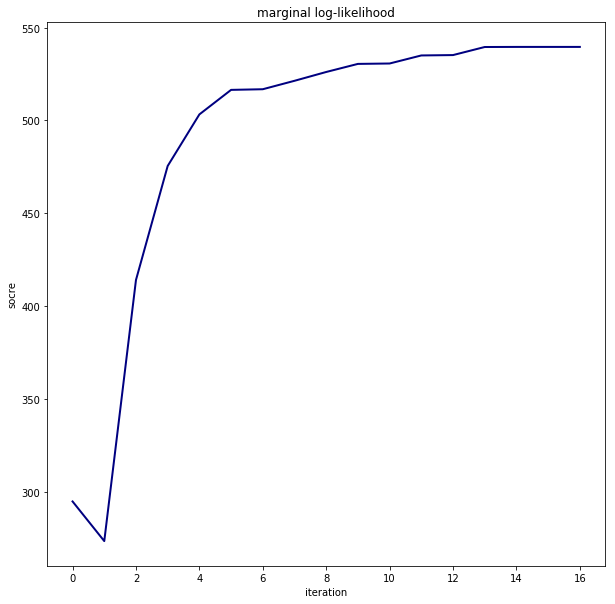

In [35]:
plt.figure(figsize=(10,10))
plt.title('marginal log-likelihood')
plt.plot(clf.scores_,color='navy',linewidth=2)
plt.ylabel('socre')
plt.xlabel('iteration')

In [64]:
def f(X,noise_amount):
    y=np.sqrt(X) * np.sin(X)
    noise=np.random.normal(0,1,len(X))
    return y+noise_amount*noise

In [65]:
degree=10
X=np.linspace(0,10,100)
# 在指定区间内，生成间隔均匀的一组数字，可以使用endpoint=False来排除间隔的终点，默认为True
y=f(X,noise_amount=1)
clf_poly=ARDRegression(threshold_lambda=1e5)
clf_poly.fit(np.vander(X,degree),y)
# 生成范德蒙矩阵？

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=100000.0, tol=0.001,
       verbose=False)

In [66]:
X_plot=np.linspace(0,11,25)
y_plot=f(X_plot,noise_amount=0)
y_mean,y_std = clf_poly.predict(np.vander(X_plot,degree),return_std=True)

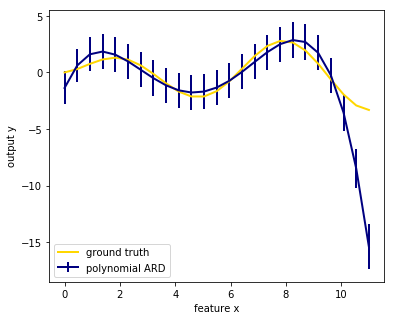

In [69]:
plt.figure(figsize=(6,5))
plt.errorbar(X_plot,y_mean,y_std,color='navy',label='polynomial ARD',linewidth=2)
plt.plot(X_plot,y_plot,color='gold',linewidth=2,label='ground truth')
plt.ylabel('output y')
plt.xlabel('feature x')
plt.legend(loc='lower left')
plt.show()